# Generare conoscenza dai dati con gli algoritmi

Come prima cosa cominciamo con il costruire un dataset artificiale per testare i nostri algoritmi, per fare questo ho preparato una serie di funzioni che usano le funzionalità di sklearn descritte [qui](https://scikit-learn.org/stable/datasets/sample_generators.html).
Il dataset qui sotto contiene 100 misure separabili linearmente.

In [1]:
from libs import dataset

X,y = dataset.create_simple_dataset()

Questi dataset di esempio hanno due feature in modo da poter essere mostrati facilmente su un grafico qui sotto un esempio

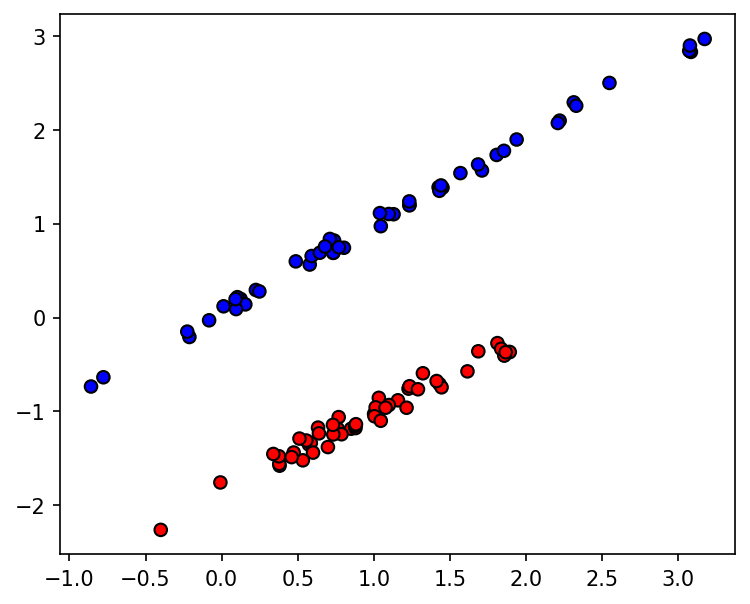

In [2]:
dataset.plot_dataset(X,y)

## Gli algoritmi di apprendimento baseline

Cominciamo col vedere un esempio di classificatore dummy (finto) che ci da un riferimento di quanto il nostro sistema di classificazione debba andare meglio, pensiamo a questo classificatore come un minimo sindacale.

Con questo classificatore introduciamo anche il concetto di metrica ovvero una misura di quanto il nostro sistema sta andando bene (o male). 

Supponiamo che il nostro dataset abbia 3 righe e che le etichette di esso siano:

$$
\begin{bmatrix}
1 & 1 & 0
\end{bmatrix}
$$

supponiamo che il nostro classificatore dummy dia come risultato :

$$
\begin{bmatrix}
1 & 1 & 1
\end{bmatrix}
$$


il nostro classificatore 2 volte su 3 darebbe un risultato corretto cioè nel 67% dei casi avremmo risultato che ci aspettiamo.
questa metrica in sklearn si chiama [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) qui sotto un esempio di elaborazione usando un classificatore dummy.

Il classificatore dummy lavora con le seguenti strategie:

* most_frequent il classificatore ritorna sempre la classe con più frequente nel dataset
* uniform il classificatore ritorna una delle classi in modo randomico
* stratified viene dato un risultato in modo randomico ma rispettando la distribuzione delle classi
* prior ritorna sempre la classe più fequente ma viene anche restituta la probabilità della stessa con il metodo ``predict_proba``
* constant viene sempre ritornato un valore costante impostato dall'utente con il parametro ``constant``

Nel nostro dataset, essendo diviso in modo equo, stimiamo una accuratezza del 50% per il momento tralasciamo cosa fa il codice.

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X,y)
dummy_classifier.score(X, y)

0.5

In [4]:
dummy_classifier = DummyClassifier(strategy="stratified")
dummy_classifier.fit(X,y)
dummy_classifier.score(X, y)

0.45

## Funzionamento di un classificatore

Il primo passo per capire il funzionamento di un classificatore sarà quello di costruirci un algoritmo di apprendimento automatico.
Partremo da un algoritmo storico per poi iniziare ad usare i classificatori che sklearn ci mette a disposizione.

### I primordi del machine learning 

Nel 1943 cercando di carpire il funzionamento del cervello bioloco al fine di reimplementarlo nell'intelligenza artificale Warren McCulloch e Walter Pitts preparano un primo schema molto semplificato del funzionamento di una cellula del cervello (neurone).

![neurone](./images/neurone.png)

Essenzialmente semplificando molto i dati in ingresso vengono valutati e se viene superata una soglia interna questi si attiva, non è interesse nel nostro corso entrare nel dettaglio biologico.

Pochi anni dopo Frank Rosenblatt escogita il primo algoritmo affinchè l'implementazione elettronica del neurone artificiale riesca a capire i pesi necessari da moltiplicare ai segnali di ingresso affinchè il neurone si attivi correttamente.

![perceptron](./images/perceptron.png)

l'uscita del nostro percettrone potrà avere due stati 1 attivato e -1 spento, abbiamo poi i nostri pesi $w$ che verranno moltiplicati al vettore delle feature in ingresso $x$ e sommati per ottenere un singolo risultato con un pochino di intuito si capisce che questo è un prodotto scalare:

Facciamo un semplice esempio:
$$
    \begin{pmatrix} 1 & 2 & 3 \end{pmatrix} \cdot \begin{pmatrix} 4 \\ 5 \\ 6 \end{pmatrix} = 1 * 4 + 2 * 4 + 3 * 6
$$

definiamo ora una semplice funzione di soglia $\phi(z)$ che restituisce 1 se il valore è superiore o uguale alla soglia (un numero che imposteremo noi) -1 altrimenti.

L'algoritmo lavora in questo modo:

* imposta a 0 tutti i valori di $w$ 
* per ogni riga del dataset di addestramento $x^i$, i rappresenta una riga qualunque del dataset, svolgere i seguenti passi:
    * calcolare il valore di output $\hat{y}^i$ (previsione)
    * aggiornare i pesi $w$ in modo da migliorare il risultato


Come funziona il passo di aggiornamento del peso?
Si potrebbe calcolare un valore per ogni peso $w_j$ pari $\Delta w_j$ (j rappresenta il numero di feature del dataset) da sommare allo stesso, questo valore sarà 0 se la previsione è corretta oppure un valore positivo o negativo se la previsione è errata, in modo da abbassare il più possibile gli errori.

Definiamo anche un'altro parametro importante $\eta$ un numero reale che rappresenta il tasso di apprendimento compreso tra 0.0 e 1.0, il cui scopo è aiutare a far convergere l'algoritmo verso la soluzione corretta una specie di pedale dell'acceleratore.

Possiamo dunque esprimere $\Delta w_j$ nel seguente modo:

$$\Delta w_j = \eta * \left( y^i - \hat{y}^i  \right) * x^i$$

Facciamo tre esempi per capire il comportamento supponendo che $\eta$ sia 0.2:

* se la previsione è corretta cioè che $y^i = \hat{y}^i$ il che implica che $y^i - \hat{y}^i = 0$ perciò $\Delta w_j$ non verrà aggionato.

* se la previsione è errata con $y^i = 1$ e $\hat{y}^i = -1$ dovremmo far in modo di correggere il colpo la nostra formula verrà impostata come $0.2 * (1 + 1) = 0.4$ che verrà moltiplicato ad ogni feature $x^i$

* se la previsione è errata con $y^i = -1$ e $\hat{y}^i = 1$ dovremmo far in modo di correggere il colpo la nostra formula verrà impostata come $0.2 * (-1 - 1) = -0.4$ che verrà moltiplicato ad ogni feature $x^i$

abbiamo dunque introdotto una retroazione che farà convergere il sistema alla soluzione desiderata.
Potremmo pensare di aver trovato una miniera d'oro e di aver risolto tutti i potenziali problemi di machine learning, ma purtoppo il percettrone riuscirà a trovare una soluzione solo se le classi del nostro problema sono separabili linearmente, e questo è il caso del nostro dataset.

### Implementazione in pyhton

Cominciamo a scrivere il codice del nostro classificatore utilizzando i concetti descritti prima, utilizzeremo un approccio a classi in quanto anche sklearn lo usa e imiteremo il suo comportamento per rendere più comprensibili alcuni concetti della stessa libreria.

Il metodo ``fit`` viene utilizzato per calcolare i pesi $w$ mentre per eseguire le previsioni su dati nuovi si utilizzerà il metodo ``predict`` (stessa regola vale per tutti gli altri algoritmi in sklearn)


In [5]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [6]:
ppn = Perceptron(eta=0.1,n_iter=10)

#serve per aggiustare il dataset l'etichetta negativa nel dataset di partenza e 0
y1 = np.where(y == 1,1,-1)

ppn.fit(X,y1)

ecco fatto abbiamo addestrato il nosto primo algoritmo di machine learning, solo per curiosità andiamo a controllare i pesi $w$ e come si è comportato l'algoritmo andando a visualizzare il numero di errori per ogni iterazione del dataset

In [7]:
ppn.w_

array([ 0.41624345, -0.41560592,  0.47404033])

Text(0, 0.5, 'Numero errori')

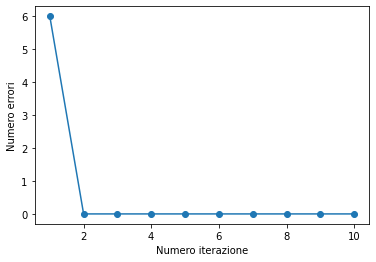

In [8]:
import matplotlib.pyplot as plt

epochs = range(1,len(ppn.errors_) +1)
plt.plot(epochs,ppn.errors_,marker='o')

plt.xlabel("Numero iterazione")
plt.ylabel("Numero errori")

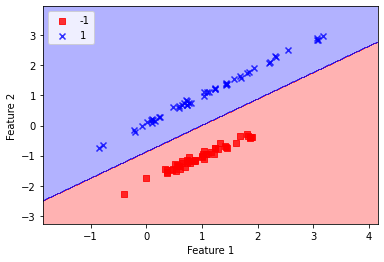

In [9]:
dataset.plot_decision_region(X,y1,ppn)

Come si vede il sitema è riuscito a calcolare una regola per dividere i due insiemi correttamente, ma come detto come si comporterebbe l'algoritmo su un dataset non lineare?

Vediamolo subito

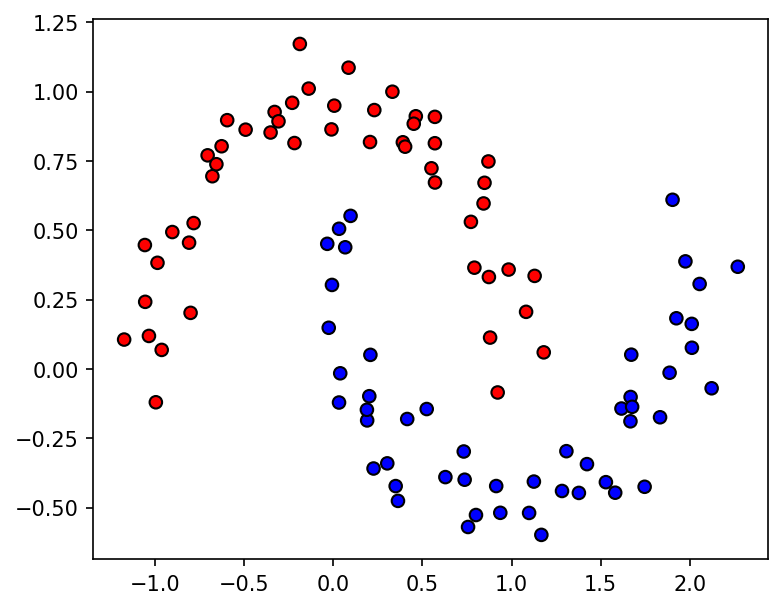

In [10]:
X,y = dataset.create_moon_dataset(separation=0.1)
dataset.plot_dataset(X,y)

y1 = np.where(y == 1,1,-1)

In [11]:
ppn.fit(X,y1)

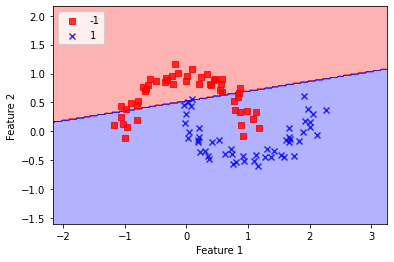

In [12]:
dataset.plot_decision_region(X,y1,ppn)

In [13]:
yhat = ppn.predict(X)
accuracy_score(y1,yhat)

0.83

### La discesa del gradiente

Introduciamo il concetto di **funzione di costo** o **funzione obiettivo** il compito di questa funzione è indicarci quanto siamo lontani dalla soluzione. 

Questa funzione ci dice che più è alto il costo più siamo lontani dalla soluzione, la funzione di costo inoltre deve avere una proprietà geometrica importante deve essere convessa e differenziabile, la prima parte ci garantisce che esista un minimo e la seconda ci permette di usare un algoritmo che sta alla base del machine learning la discesa del gradiente.

Possiamo pensare la discesa del gradiente come una discesa lungo un pendio, ad ogni passo calcoliamo il gradiente e ci muoviamo nella direzione opposta 

![gradiente](./images/gradiente.png)